In [1]:
%load_ext tensorboard

In [2]:
import os
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# config options

feature_vector_length = 784
no_of_classes = 10

In [4]:
#load the data

(x_train, y_train), (x_test, y_test) = mnist.load_data()


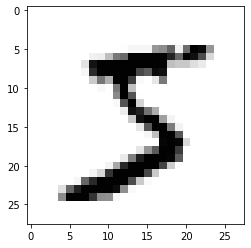

In [5]:
# plot one sample

import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'Greys')
plt.show()

In [6]:
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features

x_train = x_train.reshape(x_train.shape[0], feature_vector_length)
x_test = x_test.reshape(x_test.shape[0], feature_vector_length)

# Convert into greyscale

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [7]:
# Convert target classes to categorical ones

y_train = to_categorical(y_train, no_of_classes)
y_test = to_categorical(y_test, no_of_classes)

In [8]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [ ]:
# create the model
os.environ["CUDA_VISIBLE_DEVICES"]= "7"

model = Sequential()
model.add(Dense(350, input_shape = input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(no_of_classes, activation='softmax'))


In [49]:
# configure the model and start training
import datetime
from tensorflow.keras import backend as K

from tensorflow.keras.callbacks import LambdaCallback

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

logdir = os.path.join("/home/vishal/cldl/logs/abc")
if(not os.path.isdir(logdir)):
    os.mkdir(logdir)


#class LearningRateLoggingCallback(tensorflow.keras.callbacks.Callback):

# def lr_schedule(epoch):
#     lr = model.optimizer._decayed_lr('float32').numpy()
#     tensorflow.summary.scalar('learning rate', data=lr, step=epoch)
#     return lr
    
# lr_callback = tensorflow.keras.callbacks.LearningRateScheduler(lr_schedule)
        
# train_lr_callback = LambdaCallback( on_epoch_begin= lambda epoch,logs: print("LearningRate of %e" % (K.eval(model.optimizer._decayed_lr('float32').numpy())) ))

from tensorflow.keras.callbacks import TensorBoard

class LRTensorBoard(TensorBoard):
    # add other arguments to __init__ if you need
    def __init__(self, log_dir, **kwargs):
        super().__init__(log_dir=log_dir, **kwargs)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs.update({'lr': K.eval(self.model.optimizer.lr)})
        super().on_epoch_end(epoch, logs)
tensorboard_callback = LRTensorBoard(logdir, histogram_freq=1)


model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1,validation_split=0.2,
         callbacks=[tensorboard_callback])


2022-08-26 22:13:23.755357: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-08-26 22:13:23.756146: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1479] CUPTI activity buffer flushed


Epoch 1/10
 41/192 [=====>........................] - ETA: 0s - loss: 4.6369e-04 - accuracy: 0.9999

2022-08-26 22:13:24.451482: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-08-26 22:13:24.456876: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1479] CUPTI activity buffer flushed
2022-08-26 22:13:24.457037: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:216]  GpuTracer has collected 62 callback api events and 62 activity events.
2022-08-26 22:13:24.461005: I tensorflow/core/profiler/rpc/client/save_profile.cc:168] Creating directory: /home/vishal/cldl/logs/abc/train/plugins/profile/2022_08_26_22_13_24
2022-08-26 22:13:24.463220: I tensorflow/core/profiler/rpc/client/save_profile.cc:174] Dumped gzipped tool data for trace.json.gz to /home/vishal/cldl/logs/abc/train/plugins/profile/2022_08_26_22_13_24/grindhouse.trace.json.gz
2022-08-26 22:13:24.464303: I tensorflow/core/profiler/utils/event_span.cc:288] Generation of step-events took 0.028 ms

2022-08-26 22:13:24.465022: I tensorflow/python/profiler/internal/profiler_wrapper.c

192/192 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1617 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1480 - val_accuracy: 0.9789 - lr: 0.0010
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.1554 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 4/10
192/192 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.1657 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 5/10
192/192 [==============================] - 1s 5ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.1528 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1500 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: 6.7827e

In [11]:
test_results = model.evaluate(x_test, y_test, verbose=1)

print(f'loss : {test_results[0]} accuracy : {test_results[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9815
loss : 0.0636233389377594 accuracy : 0.9815000295639038


In [32]:
%tensorboard --logdir=/home/vishal/cldl/logs/20220826-205440/

In [11]:
from tensorboard import notebook
notebook.list()

No known TensorBoard instances running.


In [ ]:
notebook.display(port=6006, height=1000) 